In [6]:
pip install oauth2client

Note: you may need to restart the kernel to use updated packages.


In [81]:
# Imports
import pandas as pd
import numpy as np
import cx_Oracle
import pandas as pd
from datetime import date, timedelta
import urllib3
from unidecode import unidecode
from oauth2client.service_account import ServiceAccountCredentials
from IPython.core.magic import (Magics, magics_class, cell_magic)
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

# Pre processing and manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# metrics and hyperparameter optimization
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from skopt import dummy_minimize
from skopt import gp_minimize
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
import xgboost as xgb
import lightgbm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

In [10]:
df = pd.read_csv(r'C:\Users\caioa\Downloads\archive\Placement_Data_Full_Class.csv')

In [131]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [133]:
df[['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [134]:
df_dummy = pd.get_dummies(df, columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'])
                          #, dtype='float')

In [135]:
df_dummy.head(10)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.00,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.50,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.00,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.00,59.43,NaN,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.80,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
5,6,55.00,49.80,67.25,55.00,51.58,NaN,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6,7,46.00,49.20,79.00,74.28,53.29,NaN,1,0,0,...,0,1,0,0,1,0,1,0,1,0
7,8,82.00,64.00,66.00,67.00,62.14,252000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
8,9,73.00,79.00,72.00,91.34,61.29,231000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
9,10,58.00,70.00,61.00,54.00,52.21,NaN,0,1,1,...,0,1,0,0,1,0,1,0,1,0


In [136]:
df_dummy['salary'] = df_dummy['salary'].fillna(df_dummy['salary'].median())

In [137]:
df_dummy.head(10)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.00,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.50,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.00,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.00,59.43,265000.0,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.80,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
5,6,55.00,49.80,67.25,55.00,51.58,265000.0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6,7,46.00,49.20,79.00,74.28,53.29,265000.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
7,8,82.00,64.00,66.00,67.00,62.14,252000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
8,9,73.00,79.00,72.00,91.34,61.29,231000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
9,10,58.00,70.00,61.00,54.00,52.21,265000.0,0,1,1,...,0,1,0,0,1,0,1,0,1,0


In [138]:
df_dummy.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin', 'specialisation_Mkt&HR', 'status_Not Placed',
       'status_Placed'],
      dtype='object')

In [139]:
df_dummy = df_dummy[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin',
       'status_Placed']]

In [140]:
## INICIANDO A MODELAGEM DO DATASET PARA BASELINE

X = df_dummy.drop(columns=['status_Placed'])
y = df_dummy['status_Placed'] #.astype('float64')

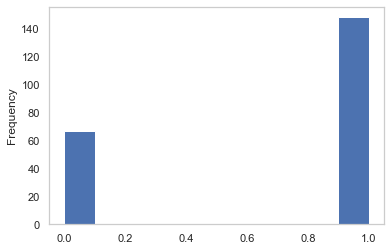

In [141]:
y.plot.hist()

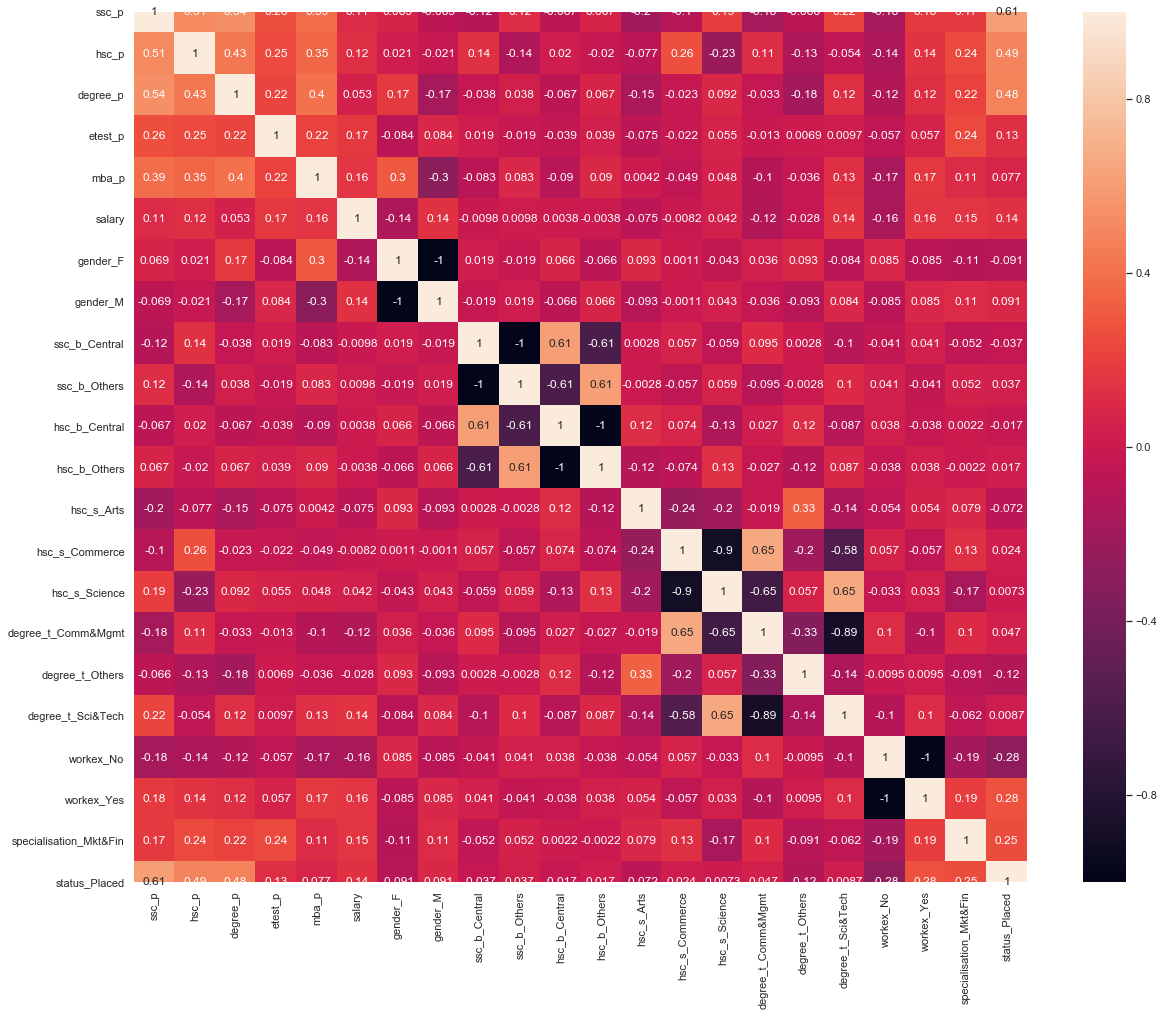

In [142]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_dummy.corr(), fmt='.2g', annot=True)

In [143]:
## FAZENDO O SPLIT EM 50X50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [170]:
knc = KNeighborsClassifier(3)
gnb = GaussianNB()
lgg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lgbm = LGBMClassifier()
xgb = xgb.XGBClassifier()

In [171]:
## DEFININDO OS MODELOS DE CLASSIFICAÇÃO

classifiers = [
    knc,
    gnb,
    lgg,
    svc,
    dtc,
    rfc,
    gbc,
    lgbm,
    xgb]

In [172]:
for clf in classifiers:
    # ajustando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados
    print('****Results****')
    # fazendo predições
    # calculando as métricas
    y_pred = clf.predict(X_test)
    # imprimindo as métricas
    print("Score:", clf.score(X_test, y_test))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Score: 0.9722222222222222
Precision: 0.971830985915493
Recall: 0.9857142857142858
Accuracy: 0.9722222222222222
GaussianNB
****Results****
Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
LogisticRegression
****Results****
Score: 0.6481481481481481
Precision: 0.6481481481481481
Recall: 1.0
Accuracy: 0.6481481481481481
SVC
****Results****
Score: 0.6481481481481481
Precision: 0.6481481481481481
Recall: 1.0
Accuracy: 0.6481481481481481
DecisionTreeClassifier
****Results****
Score: 0.8148148148148148
Precision: 0.7906976744186046
Recall: 0.9714285714285714
Accuracy: 0.8148148148148148
RandomForestClassifier
****Results****
Score: 0.8518518518518519
Precision: 0.813953488372093
Recall: 1.0
Accuracy: 0.8518518518518519
GradientBoostingClassifier
****Results****
Score: 0.8425925925925926
Precision: 0.8045977011494253
Recall: 1.0
Accuracy: 0.8425925925925926
LGBMClassifier
****Results****
Score: 0.9722222222222222
Precision: 0.971830985915493
Recall: 0.98

In [173]:
## PRIMEIRO TESTE DE BASELINE RETORNOU OVERFIT, DATASET DESBALANCEADO E REDUNDANTE

In [174]:
df_dummy.head(5)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,...,0,0,1,0,0,1,0,1,1,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,...,1,0,0,1,0,0,1,0,1,1
3,56.00,52.00,52.00,66.0,59.43,265000.0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,1


In [175]:
X.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.108669,0.068969,-0.068969,-0.116194,0.116194,...,0.066996,-0.196086,-0.101323,0.189847,-0.179581,-0.066127,0.221235,-0.175675,0.175675,0.172536
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.122921,0.021334,-0.021334,0.137013,-0.137013,...,-0.019548,-0.076627,0.258093,-0.226675,0.112816,-0.131382,-0.053599,-0.141025,0.141025,0.241630
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.053352,0.173217,-0.173217,-0.038070,0.038070,...,0.067229,-0.154817,-0.022724,0.092006,-0.032755,-0.180408,0.123477,-0.122648,0.122648,0.218286
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.169233,-0.084294,0.084294,0.018991,-0.018991,...,0.039108,-0.074871,-0.021732,0.055352,-0.012531,0.006907,0.009748,-0.056735,0.056735,0.236315
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.155673,0.300531,-0.300531,-0.083120,0.083120,...,0.090201,0.004244,-0.049415,0.048050,-0.102088,-0.036055,0.125009,-0.168811,0.168811,0.105728
salary,0.108669,0.122921,0.053352,0.169233,0.155673,1.000000,-0.140557,0.140557,-0.009793,0.009793,...,-0.003807,-0.074952,-0.008242,0.041754,-0.123502,-0.027620,0.143332,-0.156035,0.156035,0.151431
gender_F,0.068969,0.021334,0.173217,-0.084294,0.300531,-0.140557,1.000000,-1.000000,0.019429,-0.019429,...,-0.065945,0.093246,0.001087,-0.042682,0.036215,0.093246,-0.084072,0.085153,-0.085153,-0.106160
gender_M,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,0.140557,-1.000000,1.000000,-0.019429,0.019429,...,0.065945,-0.093246,-0.001087,0.042682,-0.036215,-0.093246,0.084072,-0.085153,0.085153,0.106160
ssc_b_Central,-0.116194,0.137013,-0.038070,0.018991,-0.083120,-0.009793,0.019429,-0.019429,1.000000,-1.000000,...,-0.605883,0.002758,0.056671,-0.058505,0.094939,0.002758,-0.101060,-0.040744,0.040744,-0.051565
ssc_b_Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.009793,-0.019429,0.019429,-1.000000,1.000000,...,0.605883,-0.002758,-0.056671,0.058505,-0.094939,-0.002758,0.101060,0.040744,-0.040744,0.051565


In [179]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

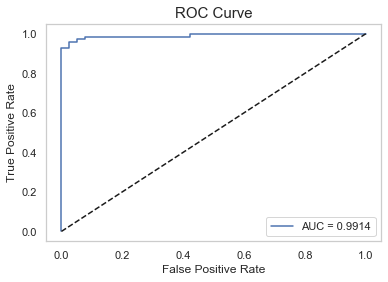

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [195]:
classifiers_2 = [
    #knc,
    #gnb,
    #lgg,
    #svc,
    dtc,
    rfc,
    gbc,
    lgbm,
    xgb]

DecisionTreeClassifier


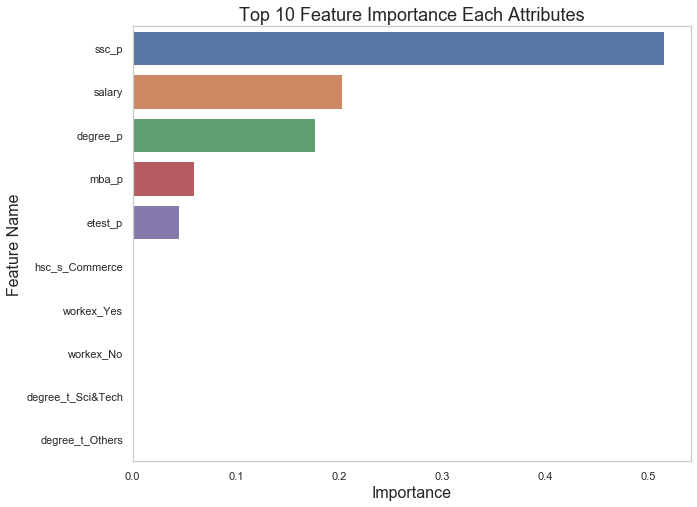

RandomForestClassifier


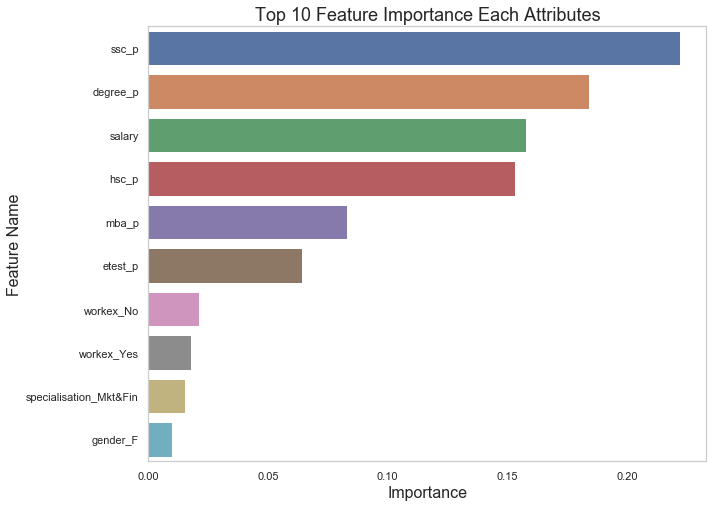

GradientBoostingClassifier


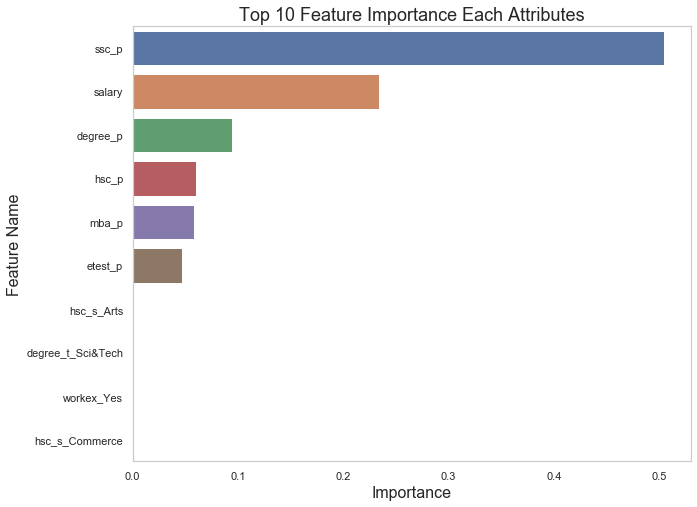

LGBMClassifier


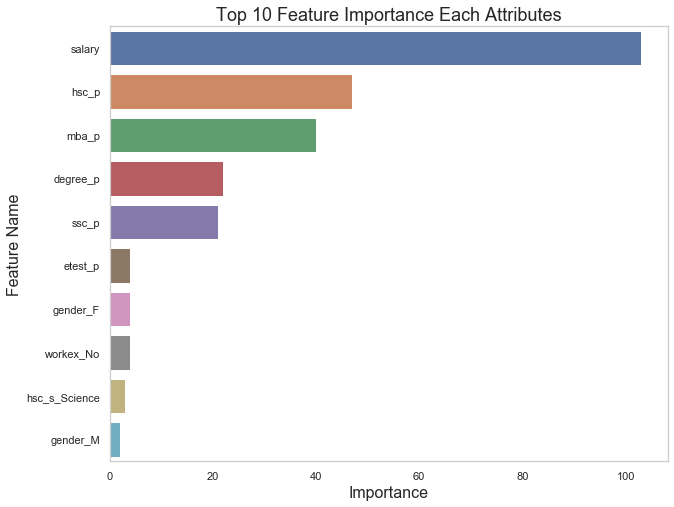

XGBClassifier


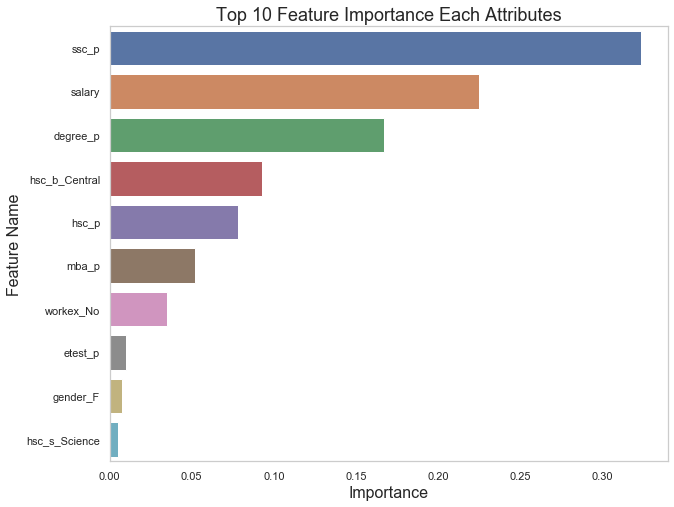

In [197]:
for clf in classifiers_2:
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    
    imp_df = pd.DataFrame({
        "Feature Name": X_train.columns,
        "Importance": clf.feature_importances_
    })
    fi = imp_df.sort_values(by="Importance", ascending=False)
    
    fi2 = fi.head(10)
    plt.figure(figsize=(10,8))
    sns.barplot(data=fi2, x='Importance', y='Feature Name')
    plt.title('Top 10 Feature Importance Each Attributes', fontsize=18)
    plt.xlabel ('Importance', fontsize=16)
    plt.ylabel ('Feature Name', fontsize=16)
    plt.show()